<a href="https://colab.research.google.com/github/nourhammmad/Leaf-Classification-DL/blob/main/Leaf_Classification_Pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import zipfile
from PIL import Image
import os
import random
import nbconvert

#Load Data

In [ ]:
# !pip install kaggle


In [ ]:
# ! mkdir ~/.kaggle


In [ ]:
# from google.colab import files
# uploaded = files.upload()


In [ ]:
# ! cp kaggle.json ~/.kaggle/

In [ ]:
# !kaggle competitions download -c leaf-classification


In [ ]:
# !unzip /content/leaf-classification.zip -d /content


In [ ]:
# import os
# os.listdir('/content')


In [ ]:
# !unzip /content/images.zip -d /content/images


In [ ]:
# !unzip /content/train.csv.zip -d /content


In [ ]:
# import shutil
# import os

# # Define source and destination paths
# source_dir = '/content/images/images'
# destination_dir = '/content/images'

# # Move all files and subdirectories from source_dir to destination_dir
# for item in os.listdir(source_dir):
#     source_item = os.path.join(source_dir, item)
#     destination_item = os.path.join(destination_dir, item)
#     shutil.move(source_item, destination_item)

# # Remove the now-empty source directory
# os.rmdir(source_dir)

# print(f"Moved all contents from {source_dir} to {destination_dir}")

# **Loading the Dataset**

In [19]:
train = pd.read_csv('/content/train.csv')
train_compare = pd.read_csv('/content/train.csv')

#sample_submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
import os
os.listdir('/content/images')


['159.jpg',
 '1265.jpg',
 '1496.jpg',
 '1490.jpg',
 '775.jpg',
 '796.jpg',
 '94.jpg',
 '80.jpg',
 '310.jpg',
 '1351.jpg',
 '1080.jpg',
 '1520.jpg',
 '1226.jpg',
 '165.jpg',
 '1155.jpg',
 '48.jpg',
 '1235.jpg',
 '1046.jpg',
 '974.jpg',
 '1457.jpg',
 '493.jpg',
 '1431.jpg',
 '846.jpg',
 '1281.jpg',
 '662.jpg',
 '1468.jpg',
 '565.jpg',
 '1473.jpg',
 '149.jpg',
 '750.jpg',
 '1315.jpg',
 '1015.jpg',
 '1423.jpg',
 '754.jpg',
 '1470.jpg',
 '1230.jpg',
 '682.jpg',
 '379.jpg',
 '488.jpg',
 '580.jpg',
 '815.jpg',
 '749.jpg',
 '809.jpg',
 '492.jpg',
 '1494.jpg',
 '185.jpg',
 '1067.jpg',
 '516.jpg',
 '1282.jpg',
 '1238.jpg',
 '686.jpg',
 '832.jpg',
 '1504.jpg',
 '971.jpg',
 '576.jpg',
 '1109.jpg',
 '1471.jpg',
 '992.jpg',
 '1325.jpg',
 '1233.jpg',
 '1441.jpg',
 '469.jpg',
 '672.jpg',
 '1338.jpg',
 '797.jpg',
 '549.jpg',
 '464.jpg',
 '177.jpg',
 '1017.jpg',
 '376.jpg',
 '880.jpg',
 '377.jpg',
 '115.jpg',
 '294.jpg',
 '1113.jpg',
 '474.jpg',
 '820.jpg',
 '1090.jpg',
 '649.jpg',
 '1394.jpg',
 '137.jp

# **Images Count**

In [ ]:
from IPython.display import HTML

# Step 1: Specify the path to the images zip file
file_name = '/content/images.zip'

# Step 2: Open the zip file in READ mode
with zipfile.ZipFile(file_name, 'r') as zip:

    # Step 3: Retrieve all file names from the zip archive
    image_names = zip.namelist()

    # Step 4: Filter out image files with '.jpg' extensions using a list comprehension
    list_of_image_filenames = [filename for filename in image_names if filename.endswith('.jpg')]

    # Step 5: Display the output in HTML
    num_images = len(list_of_image_filenames)
    display(HTML(f"""
    <div>
        <p>The number of images in the zip file is: <strong>{num_images}</strong></p>
    </div>
    """))


# **Describe the data**

In [ ]:
from IPython.display import HTML

# Example: Shape of the training dataset
train_shape = train.shape

# Display the output in HTML
display(HTML(f"""
<div>
    <h2> Training Dataset Shape</h2>
    <p>
        The dataset has <strong>{train_shape[0]}</strong> rows and <strong>{train_shape[1]}</strong> columns.
    </p>
</div>
"""))


# **Dataset Info**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


# **Features Datatypes**

# **Apply label encoding:**



**Mapping after enconding in <strong>List : mapping</strong>**  

# **Number of Classes**

In [ ]:
# Count the number of species
num_classes = train['species'].unique().shape[0]
num_classes

99

# **Classes**

In [ ]:
classes = train['species'].unique().tolist()
classes

['Acer_Opalus',
 'Pterocarya_Stenoptera',
 'Quercus_Hartwissiana',
 'Tilia_Tomentosa',
 'Quercus_Variabilis',
 'Magnolia_Salicifolia',
 'Quercus_Canariensis',
 'Quercus_Rubra',
 'Quercus_Brantii',
 'Salix_Fragilis',
 'Zelkova_Serrata',
 'Betula_Austrosinensis',
 'Quercus_Pontica',
 'Quercus_Afares',
 'Quercus_Coccifera',
 'Fagus_Sylvatica',
 'Phildelphus',
 'Acer_Palmatum',
 'Quercus_Pubescens',
 'Populus_Adenopoda',
 'Quercus_Trojana',
 'Alnus_Sieboldiana',
 'Quercus_Ilex',
 'Arundinaria_Simonii',
 'Acer_Platanoids',
 'Quercus_Phillyraeoides',
 'Cornus_Chinensis',
 'Liriodendron_Tulipifera',
 'Cytisus_Battandieri',
 'Rhododendron_x_Russellianum',
 'Alnus_Rubra',
 'Eucalyptus_Glaucescens',
 'Cercis_Siliquastrum',
 'Cotinus_Coggygria',
 'Celtis_Koraiensis',
 'Quercus_Crassifolia',
 'Quercus_Kewensis',
 'Cornus_Controversa',
 'Quercus_Pyrenaica',
 'Callicarpa_Bodinieri',
 'Quercus_Alnifolia',
 'Acer_Saccharinum',
 'Prunus_X_Shmittii',
 'Prunus_Avium',
 'Quercus_Greggii',
 'Quercus_Suber'

# **Each Class Frequency**

In [ ]:
train['species'].value_counts()

,count
species,
Acer_Opalus,10
Crataegus_Monogyna,10
Acer_Mono,10
Magnolia_Heptapeta,10
Acer_Capillipes,10
...,...
Alnus_Rubra,10
Rhododendron_x_Russellianum,10
Cytisus_Battandieri,10


# **Clean the data**

In [ ]:
train.isnull().sum()

,0
id,0
species,0
margin1,0
margin2,0
margin3,0
...,...
texture60,0
texture61,0
texture62,0
texture63,0


no nulls

# **Check Duplicates**

In [ ]:
train.duplicated().sum()

0

no duplicates

In [ ]:
import pandas as pd

# Assuming 'train' is your training dataset with numeric columns

# Step 1: Extract numeric columns except 'id'
# Drop the 'id' column if it's present, then select only the numeric columns
train_numeric = train.drop(columns=['id'], errors='ignore')  # Drop 'id' column if it exists
train_numeric = train_numeric.select_dtypes(include=[float, int])  # Keep only numeric columns (int and float)

# Step 2: Calculate the mean and standard deviation for each numeric column
train_mean = train_numeric.mean()  # Calculate mean for each feature (column)
train_std = train_numeric.std()    # Calculate standard deviation for each feature (column)

# Step 3: Print mean and standard deviation to check if standardization is needed
print("Mean of each feature:")
print(train_mean)

print("\nStandard Deviation of each feature:")
print(train_std)

# Step 4: Decide if standardization is needed (based on large mean or high variance)
def should_standardize(mean, std, threshold=0.5):
    standardization_needed = {}
    for col in mean.index:
        # If the standard deviation is large (greater than the threshold), or the mean is far from 0
        if std[col] > threshold or abs(mean[col]) > threshold:
            standardization_needed[col] = True
        else:
            standardization_needed[col] = False
    return standardization_needed

# Get decision on which columns need standardization
standardization_decision = should_standardize(train_mean, train_std)

# Print decision on which columns need standardization
print("\nStandardization Decision (True means standardization is needed):")
print(standardization_decision)

# Step 5: Standardize the data by subtracting the mean and dividing by the standard deviation
train_standardized = train_numeric.copy()  # Create a copy of the numeric columns

# Apply standardization only on columns that need it
for feature, need_standardization in standardization_decision.items():
    if need_standardization:
        train_standardized[feature] = (train_standardized[feature] - train_mean[feature]) / train_std[feature]

# Step 6: Display the standardized dataset
print("\nStandardized Data (where applicable):")
train_standardized.head()


Mean of each feature:
margin1      0.017412
margin2      0.028539
margin3      0.031988
margin4      0.023280
margin5      0.014264
               ...   
texture60    0.014017
texture61    0.002688
texture62    0.020291
texture63    0.008989
texture64    0.019420
Length: 192, dtype: float64

Standard Deviation of each feature:
margin1      0.019739
margin2      0.038855
margin3      0.025847
margin4      0.028411
margin5      0.018390
               ...   
texture60    0.060151
texture61    0.011415
texture62    0.039040
texture63    0.013791
texture64    0.022768
Length: 192, dtype: float64

Standardization Decision (True means standardization is needed):
{'margin1': False, 'margin2': False, 'margin3': False, 'margin4': False, 'margin5': False, 'margin6': False, 'margin7': False, 'margin8': False, 'margin9': False, 'margin10': False, 'margin11': False, 'margin12': False, 'margin13': False, 'margin14': False, 'margin15': False, 'margin16': False, 'margin17': False, 'margin18': False, '

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


# **Visualization**

<ipython-input-86-ba75356f3ec5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = species_count.index, y = species_count.values, palette="Blues_d")


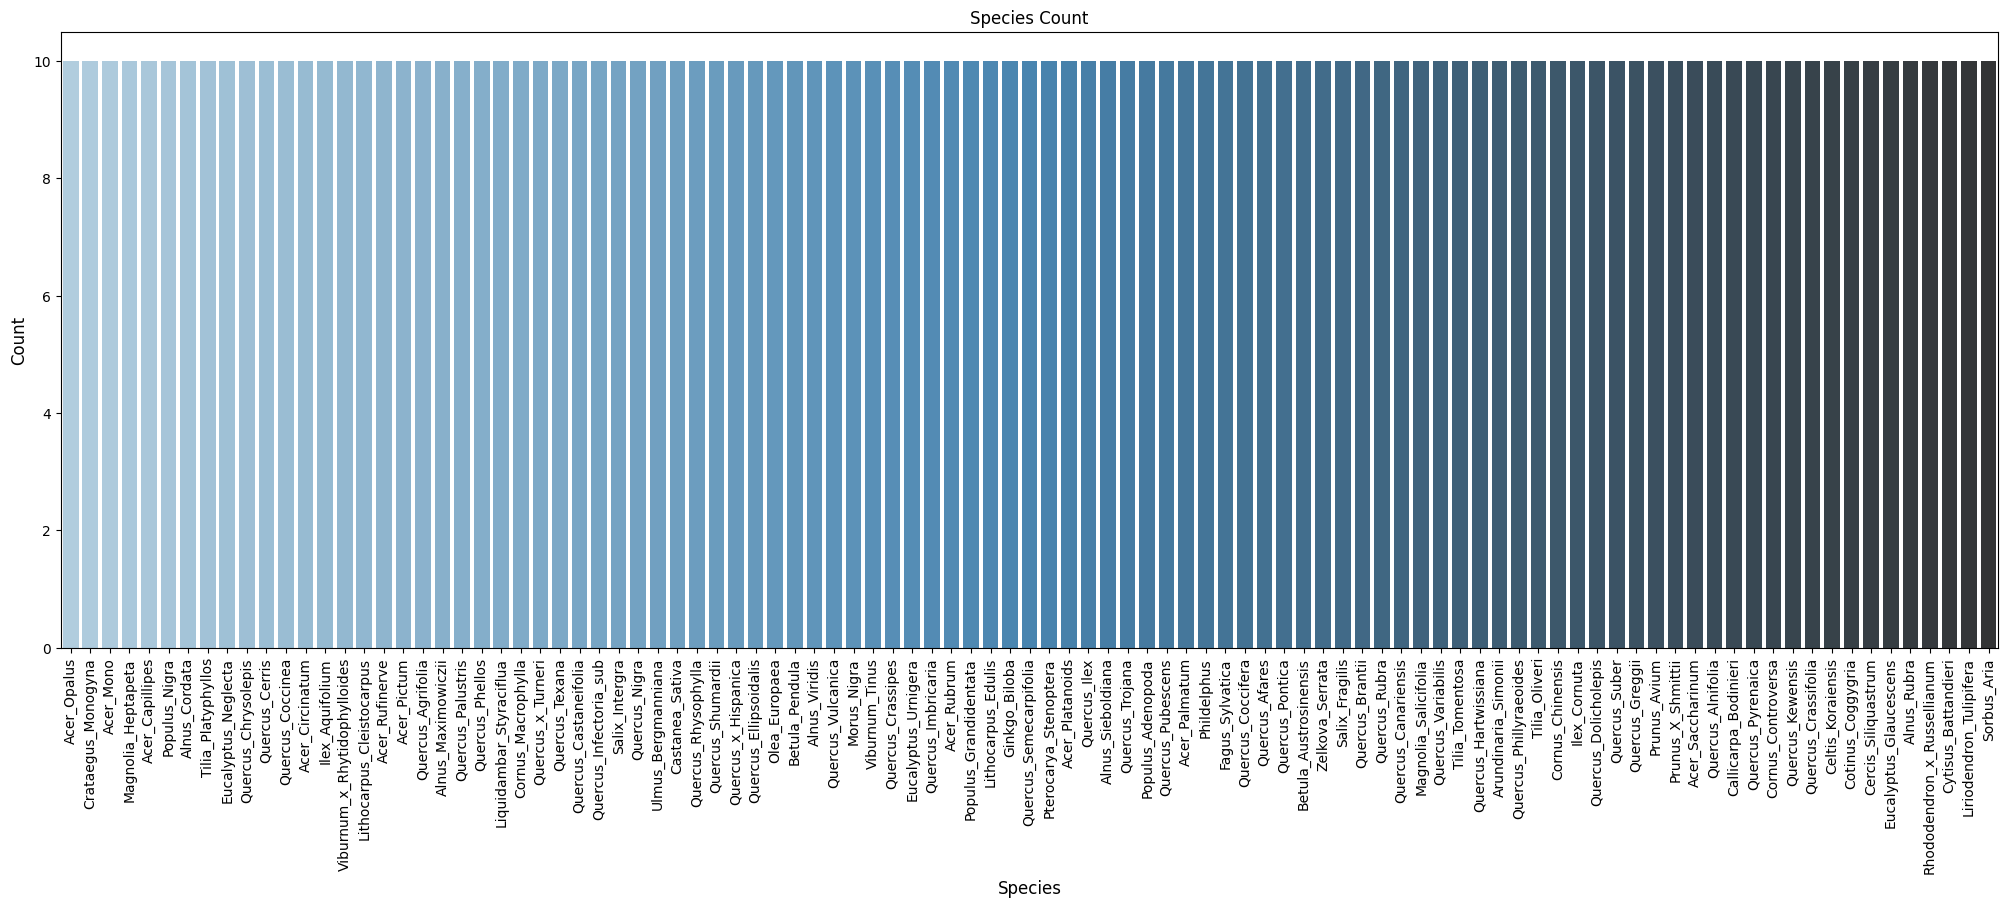

In [ ]:
# Count the number of datapoints for every species
species_count = train['species'].value_counts()

plt.figure(figsize=(25,8))
sns.barplot(x = species_count.index, y = species_count.values, palette="Blues_d")
plt.title('Species Count')
plt.xticks(rotation='vertical')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Species', fontsize=12)
plt.show()

<ipython-input-87-ebbe5ebe7294>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


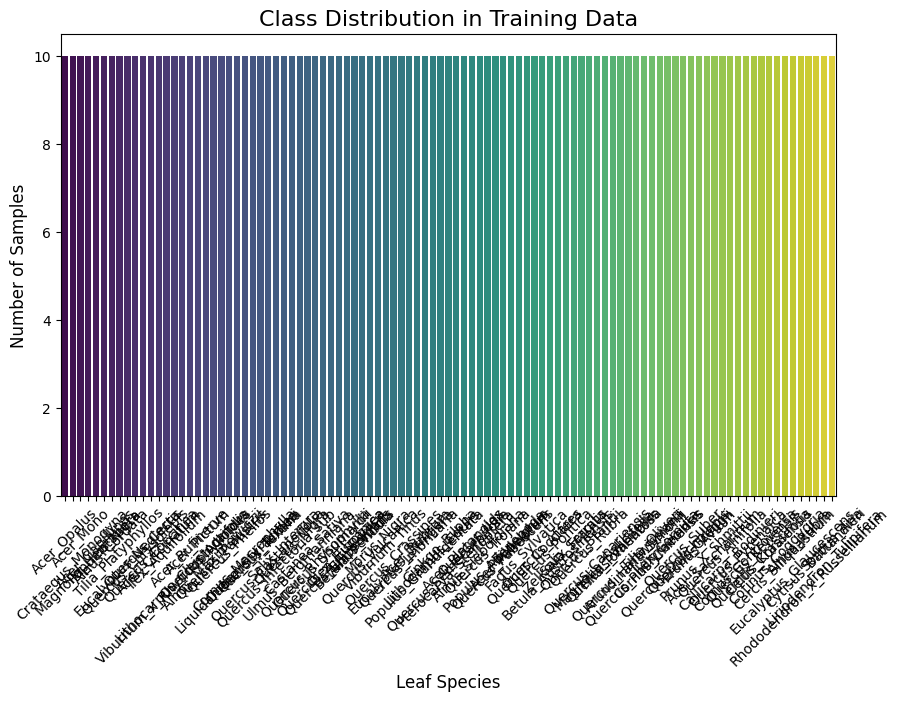

In [ ]:
class_counts = train['species'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution in Training Data", fontsize=16)
plt.xlabel("Leaf Species", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()


# **Draw some of the images**

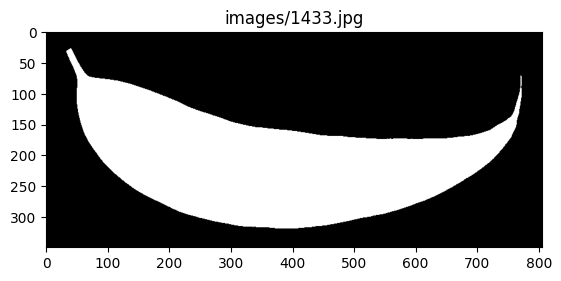

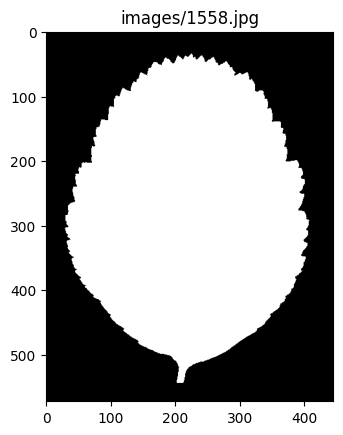

Exception ignored in: <function _xla_gc_callback at 0x7999265beb90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


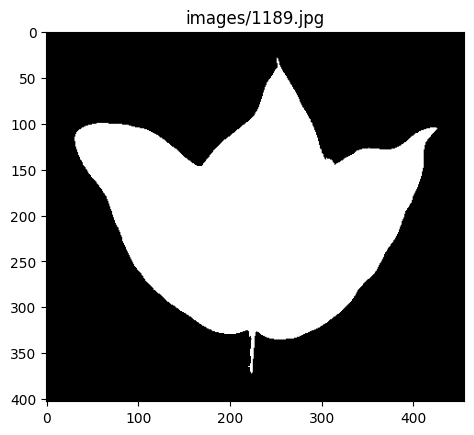

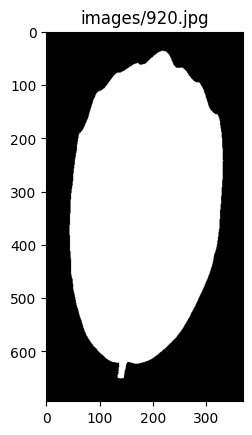

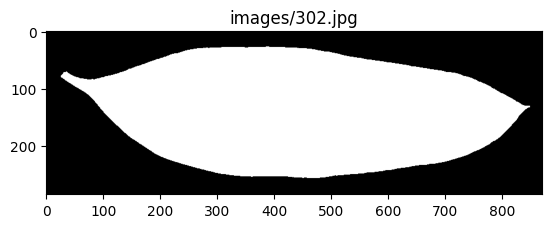

In [ ]:
# Match the image filenames in the zip file with the ids in the train_df DataFrame
matched_images = [img for img in image_names if any(str(id) in img for id in train['id'])]

# Randomly pick 5 images
random.seed(4)
five_images = random.sample(matched_images, 5)

# Display the images
for img_name in five_images:
    with zipfile.ZipFile('/content/images.zip', 'r') as myzip:
        with myzip.open(img_name) as myfile:
            img = Image.open(myfile)
            plt.imshow(img, cmap='gray')
            plt.title(img_name)
            plt.show()

# **correlation analysis**

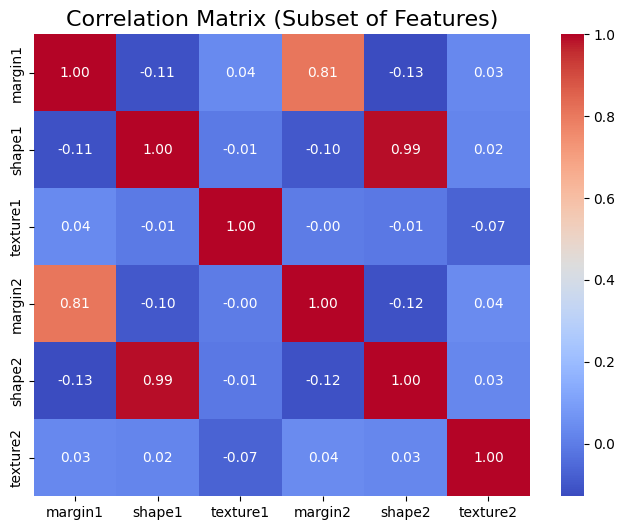

In [ ]:
# Select a subset of columns for analysis
subset_features = ['margin1', 'shape1', 'texture1', 'margin2', 'shape2', 'texture2']
correlation_matrix = train[subset_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Subset of Features)", fontsize=16)
plt.show()


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random
import pandas as pd
from builtins import zip

# Load the dataset (assuming 'train.csv' is already loaded into 'train' DataFrame)
train = pd.read_csv('train.csv')  # Make sure to load the CSV file if not already done

# Add the 'image_path' column to the train DataFrame
train['image_path'] = train['id'].apply(lambda x: os.path.join('/content/images', f'{x}.jpg'))  # Adjust extension if needed

# Define a preprocessing function
def preprocess_images(df, target_column=None, target_size=(128, 128)):
    images = []
    labels = []
    ids = []
    for _, row in df.iterrows():
        img_path = row['image_path']
        img = load_img(img_path, target_size=target_size)  # Load and resize the image
        img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img_array)
        ids.append(row['id'])  # Track the IDs

        # Append the label if the target column is provided
        if target_column:
            labels.append(row[target_column])

    images = np.array(images)
    labels = np.array(labels) if target_column else None
    return images, labels, np.array(ids)  # Ensure IDs are returned as a numpy array

# Preprocess all images and labels from the train dataset
X, y, ids = preprocess_images(train, target_column='species')

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Label encode the 'species' column

# One-hot encode the labels
y_encoded = to_categorical(y_encoded, num_classes=len(label_encoder.classes_))

# Data augmentation setup
datagen = ImageDataGenerator(
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment data and track IDs
augmented_images = []
augmented_labels = []
augmented_ids = []

# Loop over each image in the dataset for augmentation
# Loop over each image in the dataset for augmentation
for img, label, img_id in zip(X, y_encoded, ids):
    img = np.expand_dims(img, 0)  # Add batch dimension to the image

    # Randomly choose between shear or flip for augmentation
    aug_iter = datagen.flow(img, batch_size=1) if random.choice([True, False]) else \
               ImageDataGenerator(horizontal_flip=True, fill_mode='nearest').flow(img, batch_size=1)

    # Generate one augmented image
    aug_img = next(aug_iter)[0]
    augmented_images.append(aug_img)
    augmented_labels.append(label)
    augmented_ids.append(img_id)


# Convert augmented data to arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)
augmented_ids = np.array(augmented_ids)

# Combine original and augmented data
X_augmented = np.concatenate((X, augmented_images), axis=0)
y_augmented = np.concatenate((y_encoded, augmented_labels), axis=0)
augmented_ids = np.concatenate((ids, augmented_ids), axis=0)

# Now split the augmented data into 80% training and 20% testing
X_train, X_test, y_train, y_test, train_ids, test_ids = train_test_split(
    X_augmented, y_augmented, augmented_ids, test_size=0.2, random_state=42, stratify=y_augmented
)

# Drop the 'image_path' column after preprocessing (optional)
train.drop(columns=['image_path'], inplace=True)

# Print shapes to verify augmentation
print(f"X_train shape (with augmentation): {X_train.shape}")
print(f"y_train shape (with augmentation): {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Number of augmented training IDs: {len(train_ids)}")
print(f"Number of testing IDs: {len(test_ids)}")
# Create a DataFrame to track original and augmented IDs
# Merge species information with original and augmented data
original_species = train[['id', 'species']]  # Get species for original data
augmented_species = pd.DataFrame({
    'id': augmented_ids[len(ids):],  # IDs from augmented data
    'species': label_encoder.inverse_transform(np.argmax(augmented_labels, axis=1))  # Map back to species
})

# Create original and augmented DataFrames with 'type' and 'species' columns
original_df = pd.merge(pd.DataFrame({'id': ids, 'type': 'original'}), original_species, on='id', how='left')
augmented_df = pd.merge(pd.DataFrame({'id': augmented_ids[len(ids):], 'type': 'augmented'}), augmented_species, on='id', how='left')

# Concatenate the two DataFrames
id_comparison_df = pd.concat([original_df, augmented_df], ignore_index=True)

# Sort the DataFrame by ID for easier visualization
id_comparison_df.sort_values(by='id', inplace=True)

# Display the comparison DataFrame
print(id_comparison_df.head(20))  # Print first 20 rows to check

# Save to CSV for later analysis
id_comparison_df.to_csv('id_comparison_with_species.csv', index=False)

# Check class distribution after augmentation
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)

# Safely create the class distribution dictionary
class_distribution = dict(zip(unique, counts))
print("Class distribution after augmentation:", class_distribution)


X_train shape (with augmentation): (1584, 128, 128, 3)
y_train shape (with augmentation): (1584, 99)
X_test shape: (396, 128, 128, 3)
y_test shape: (396, 99)
Number of augmented training IDs: 1584
Number of testing IDs: 396
     id       type                species
0     1   original            Acer_Opalus
990   1  augmented            Acer_Opalus
1     2   original  Pterocarya_Stenoptera
991   2  augmented  Pterocarya_Stenoptera
2     3   original   Quercus_Hartwissiana
992   3  augmented   Quercus_Hartwissiana
3     5   original        Tilia_Tomentosa
993   5  augmented        Tilia_Tomentosa
4     6   original     Quercus_Variabilis
994   6  augmented     Quercus_Variabilis
5     8   original   Magnolia_Salicifolia
995   8  augmented   Magnolia_Salicifolia
6    10   original    Quercus_Canariensis
996  10  augmented    Quercus_Canariensis
997  11  augmented          Quercus_Rubra
7    11   original          Quercus_Rubra
998  14  augmented        Quercus_Brantii
8    14   original  

# **Identify Categorical Columns**

In [ ]:
categorical_columns = train.select_dtypes(include=['object']).columns


In [ ]:
from sklearn import preprocessing

# Initialize the LabelEncoder
le = preprocessing.LabelEncoder()

# Loop through each categorical column and apply label encoding
for col in categorical_columns:
    # Fit the label encoder on the column data
    le.fit(train[col])

    # Print the class labels (original values)
    print(f"Classes for {col}: {list(le.classes_)}")

    # Define a function to transform values and handle unseen labels
    def safe_transform(value):
        if value in le.classes_:
            return le.transform([value])[0]
        else:
            return -1  # Or some other value to represent unseen labels

    # Apply the safe_transform function to the column
    train[col] = train[col].apply(safe_transform)

    # Print the encoded values
    print(f"Encoded values for {col}: {train[col].tolist()}")

    # Print the mapping of encoded values to original labels
    mapping = {label: class_name for label, class_name in enumerate(le.classes_)}
    print(f"Mapping for {col}: {mapping}")


Classes for species: ['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shm

In [ ]:
# # Install TensorBoard
# !pip install tensorboard

In [ ]:
# Evaluating on the test data
test_predictions = model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img

# Convert predictions from one-hot encoding to class indices
predicted_classes = np.argmax(test_predictions, axis=1)

# Map class indices back to species names using the label encoder
predicted_species_names = label_encoder.inverse_transform(predicted_classes)  # Properly decode the species names

# Add predictions and probabilities to a DataFrame for X_test
test_results = pd.DataFrame({
    'id': test_ids,  # Using test_ids from your split
    'predicted_species': predicted_species_names,  # Use decoded species names
    'predicted_probabilities': np.max(test_predictions, axis=1)  # Add maximum probability for each prediction
})

# Merge predicted results with the actual species from the training set
# Assuming 'train' DataFrame contains actual species with 'id' column for mapping
merged_results = test_results.merge(train_compare[['id', 'species']], on='id', how='left')

# Check correctness of predictions
merged_results['correct'] = merged_results['predicted_species'] == merged_results['species']

# Count the number of correct predictions
correct_predictions = merged_results['correct'].sum()
total_predictions = len(merged_results)
accuracy = correct_predictions / total_predictions * 100

# Print the overall accuracy
print(f"Total Predictions: {total_predictions}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Accuracy: {accuracy:.2f}%")

# Display the correct predictions
correct_predictions_df = merged_results[merged_results['correct'] == True]


# Define the number of images to display (10 images per row, 5 rows)
images_per_row = 10
num_rows = 5
total_images = images_per_row * num_rows

# Create the subplot grid (5 rows x 10 columns)
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 5 * num_rows))  # Adjust size as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Display images with predictions and actual species
for idx, (index, row) in enumerate(correct_predictions_df.iterrows()):
    if idx >= total_images:  # Only display the first 50 correct predictions
        break

    image_path = f'/content/images/{int(row["id"])}.jpg'  # Image file path
    predicted_species = row['predicted_species']  # Decoded species name
    predicted_probability = row['predicted_probabilities']
    actual_species = row['species']

    # Load the image and display it
    img = load_img(image_path, target_size=(128, 128))  # Resize the image to ensure they are the same size
    ax = axes[idx]  # Get the axis for this image
    ax.imshow(img)  # Display the image
    ax.axis('off')  # Hide axes for better presentation
    ax.set_title(f"Pred: {predicted_species}\nActual: {actual_species}\nConf: {predicted_probability:.4f}", fontsize=7)  # Smaller font size for title

# Adjust layout for better visualization
plt.subplots_adjust(hspace=0.01,wspace=0.01,bottom=0.01)  # Reduce space between rows
plt.tight_layout(pad=0.5)  # Ensure images are displayed next to each other without overlap
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/logs

#### Pretrained Model Evaluation

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datetime import datetime

# Define Image Shape and Classes
input_shape = (128, 128, 3)  # Resize all images to this size
num_classes = y_train.shape[1]  # Number of output classes

# Pretrained Models to Try
pretrained_models = {
    'vgg16': VGG16(weights='imagenet', include_top=False, input_shape=input_shape),
    'resnet50': ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
}

best_val_accuracy = 0
best_model_name = ''

for model_name, base_model in pretrained_models.items():
    print(f"Training with {model_name}...")

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add Custom Layers on Top
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the Model
    model.compile(
        optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for pretrained models
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks for Early Stopping and Model Checkpointing
    checkpoint_path = f'/content/best_model_{model_name}.keras'
    model_checkpoint = ModelCheckpoint(
        checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max'
    )

    log_dir = f'/content/logs/{model_name}_{datetime.now().strftime("%Y%m%d-%H%M%S")}'
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    # Train the Model
    history = model.fit(
        X_train,
        y_train,
        epochs=15,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
            model_checkpoint,
            tensorboard_callback
        ]
    )

    # Evaluate Best Validation Accuracy
    val_acc = max(history.history['val_accuracy'])
    print(f"{model_name} validation accuracy: {val_acc:.4f}")

    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        best_model_name = checkpoint_path

# Print the Best Pretrained Model
print(f"Best model: {best_model_name.split('_')[-1].split('.')[0]}")
print(f"Model saved at: {best_model_name}")


In [ ]:
# Load the best model
best_model_pretrained = tf.keras.models.load_model(best_model_name)
print(best_model_name)

# Use the model for prediction on test data
predictions_pretrained = best_model_pretrained.predict(X_test)

test_loss_best_optimizer, test_accuracy_best_optimizer = best_model_pretrained.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
# Convert predictions from one-hot encoding to class labels

# You can also compare the predicted classes with the true classes in y_test


In [ ]:
best_model_pretrained.summary()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img

# Convert predictions from one-hot encoding to class indices
predicted_classes = np.argmax(predictions_pretrained, axis=1)

# Map class indices back to species names using the label encoder
predicted_species_names = label_encoder.inverse_transform(predicted_classes)  # Properly decode the species names

# Add predictions and probabilities to a DataFrame for X_test
test_results = pd.DataFrame({
    'id': test_ids,  # Using test_ids from your split
    'predicted_species': predicted_species_names,  # Use decoded species names
    'predicted_probabilities': np.max(predictions_pretrained, axis=1)  # Add maximum probability for each prediction
})

# Merge predicted results with the actual species from the training set
# Assuming 'train' DataFrame contains actual species with 'id' column for mapping
merged_results = test_results.merge(train_compare[['id', 'species']], on='id', how='left')

# Check correctness of predictions
merged_results['correct'] = merged_results['predicted_species'] == merged_results['species']

# Count the number of correct predictions
correct_predictions = merged_results['correct'].sum()
total_predictions = len(merged_results)
accuracy = correct_predictions / total_predictions * 100

# Print the overall accuracy
print(f"Total Predictions: {total_predictions}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Accuracy: {accuracy:.2f}%")

# Display the correct predictions
correct_predictions_df = merged_results[merged_results['correct'] == True]


# Define the number of images to display (10 images per row, 5 rows)
images_per_row = 10
num_rows = 5
total_images = images_per_row * num_rows

# Create the subplot grid (5 rows x 10 columns)
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 5 * num_rows))  # Adjust size as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Display images with predictions and actual species
for idx, (index, row) in enumerate(correct_predictions_df.iterrows()):
    if idx >= total_images:  # Only display the first 50 correct predictions
        break

    image_path = f'/content/images/{int(row["id"])}.jpg'  # Image file path
    predicted_species = row['predicted_species']  # Decoded species name
    predicted_probability = row['predicted_probabilities']
    actual_species = row['species']

    # Load the image and display it
    img = load_img(image_path, target_size=(128, 128))  # Resize the image to ensure they are the same size
    ax = axes[idx]  # Get the axis for this image
    ax.imshow(img)  # Display the image
    ax.axis('off')  # Hide axes for better presentation
    ax.set_title(f"Pred: {predicted_species}\nActual: {actual_species}\nConf: {predicted_probability:.4f}", fontsize=7)  # Smaller font size for title

# Adjust layout for better visualization
plt.subplots_adjust(hspace=0.01,wspace=0.01,bottom=0.01)  # Reduce space between rows
plt.tight_layout(pad=0.5)  # Ensure images are displayed next to each other without overlap
plt.show()


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime

# Define Image Shape and Classes
input_shape = (128, 128, 3)  # Resize all images to this size
num_classes = y_train.shape[1]  # Number of output classes

# Load Pretrained VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze Lower Layers and Unfreeze Top Layers for Fine-Tuning
for layer in base_model.layers[:10]:  # Freeze the first 10 layers
    layer.trainable = False
for layer in base_model.layers[10:]:  # Unfreeze the rest
    layer.trainable = True

# Add Custom Layers on Top
model_finetuning = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Replaces Flatten for better generalization
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the Model with a Lower Learning Rate for Fine-Tuning
model_finetuning.compile(
    optimizer=Adam(learning_rate=1e-5),  # Fine-tuning requires a very low learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for Early Stopping and Model Checkpointing
checkpoint_path = '/content/best_model_vgg16.keras'
model_checkpoint = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max'
)

log_dir = f'/content/logs/vgg16_{datetime.now().strftime("%Y%m%d-%H%M%S")}'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the Model
history = model_finetuning.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        model_checkpoint,
        tensorboard_callback
    ]
)

# Print Best Validation Accuracy
val_acc = max(history.history['val_accuracy'])
print(f'VGG16 validation accuracy: {val_acc:.4f}')
print(f'Model saved at: {checkpoint_path}')


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 708s 14s/step - accuracy: 0.0082 - loss: 4.7817 - val_accuracy: 0.0202 - val_loss: 4.5965
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 748s 14s/step - accuracy: 0.0122 - loss: 4.6227 - val_accuracy: 0.0429 - val_loss: 4.5063
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 723s 14s/step - accuracy: 0.0147 - loss: 4.5322 - val_accuracy: 0.0631 - val_loss: 4.4026
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 723s 14s/step - accuracy: 0.0353 - loss: 4.4274 - val_accuracy: 0.1465 - val_loss: 4.2083
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 744s 14s/step - accuracy: 0.0658 - loss: 4.2397 - val_accuracy: 0.1793 - val_loss: 3.8657
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 738s 14s/step - accuracy: 0.0969 - loss: 3.9920 - val_accuracy: 0.3384 - val_loss: 3.4748
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 746s 14s/step - accuracy: 0.1554 - loss: 3.6032 - val_accuracy: 0.3561 - val_loss: 3.0231
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 704s 14s/step -

In [17]:
import numpy as np
import tensorflow as tf

# Load the best model
model_directory = "/content/best_model_vgg16.keras"
best_model_pretrained = tf.keras.models.load_model(model_directory)

# Use the model for prediction on test data
predictions_pretrained = best_model_pretrained.predict(X_test)

# Evaluate the model on the test data
test_loss_best_optimizer, test_accuracy_best_optimizer = best_model_pretrained.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy_best_optimizer * 100:.2f}%")

# Convert predictions from one-hot encoding to class labels
predicted_classes = np.argmax(predictions_pretrained, axis=1)
true_classes = np.argmax(y_test, axis=1)  # assuming y_test is one-hot encoded

# Optionally, compare the predicted classes with the true classes
comparison = predicted_classes == true_classes
print(f"Accuracy of prediction on individual test cases: {np.mean(comparison) * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 98s 7s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.8531 - loss: 0.6961
Test Accuracy: 86.11%
Accuracy of prediction on individual test cases: 86.11%


In [25]:
best_model_pretrained.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 99)                  │          25,443 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,143,403 (156.95 MB)

 Trainable params: 13,135,971 (50.11 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

 Optimizer params: 26,271,944 (100.22 MB)

Total Predictions: 396
Correct Predictions: 341
Accuracy: 86.11%


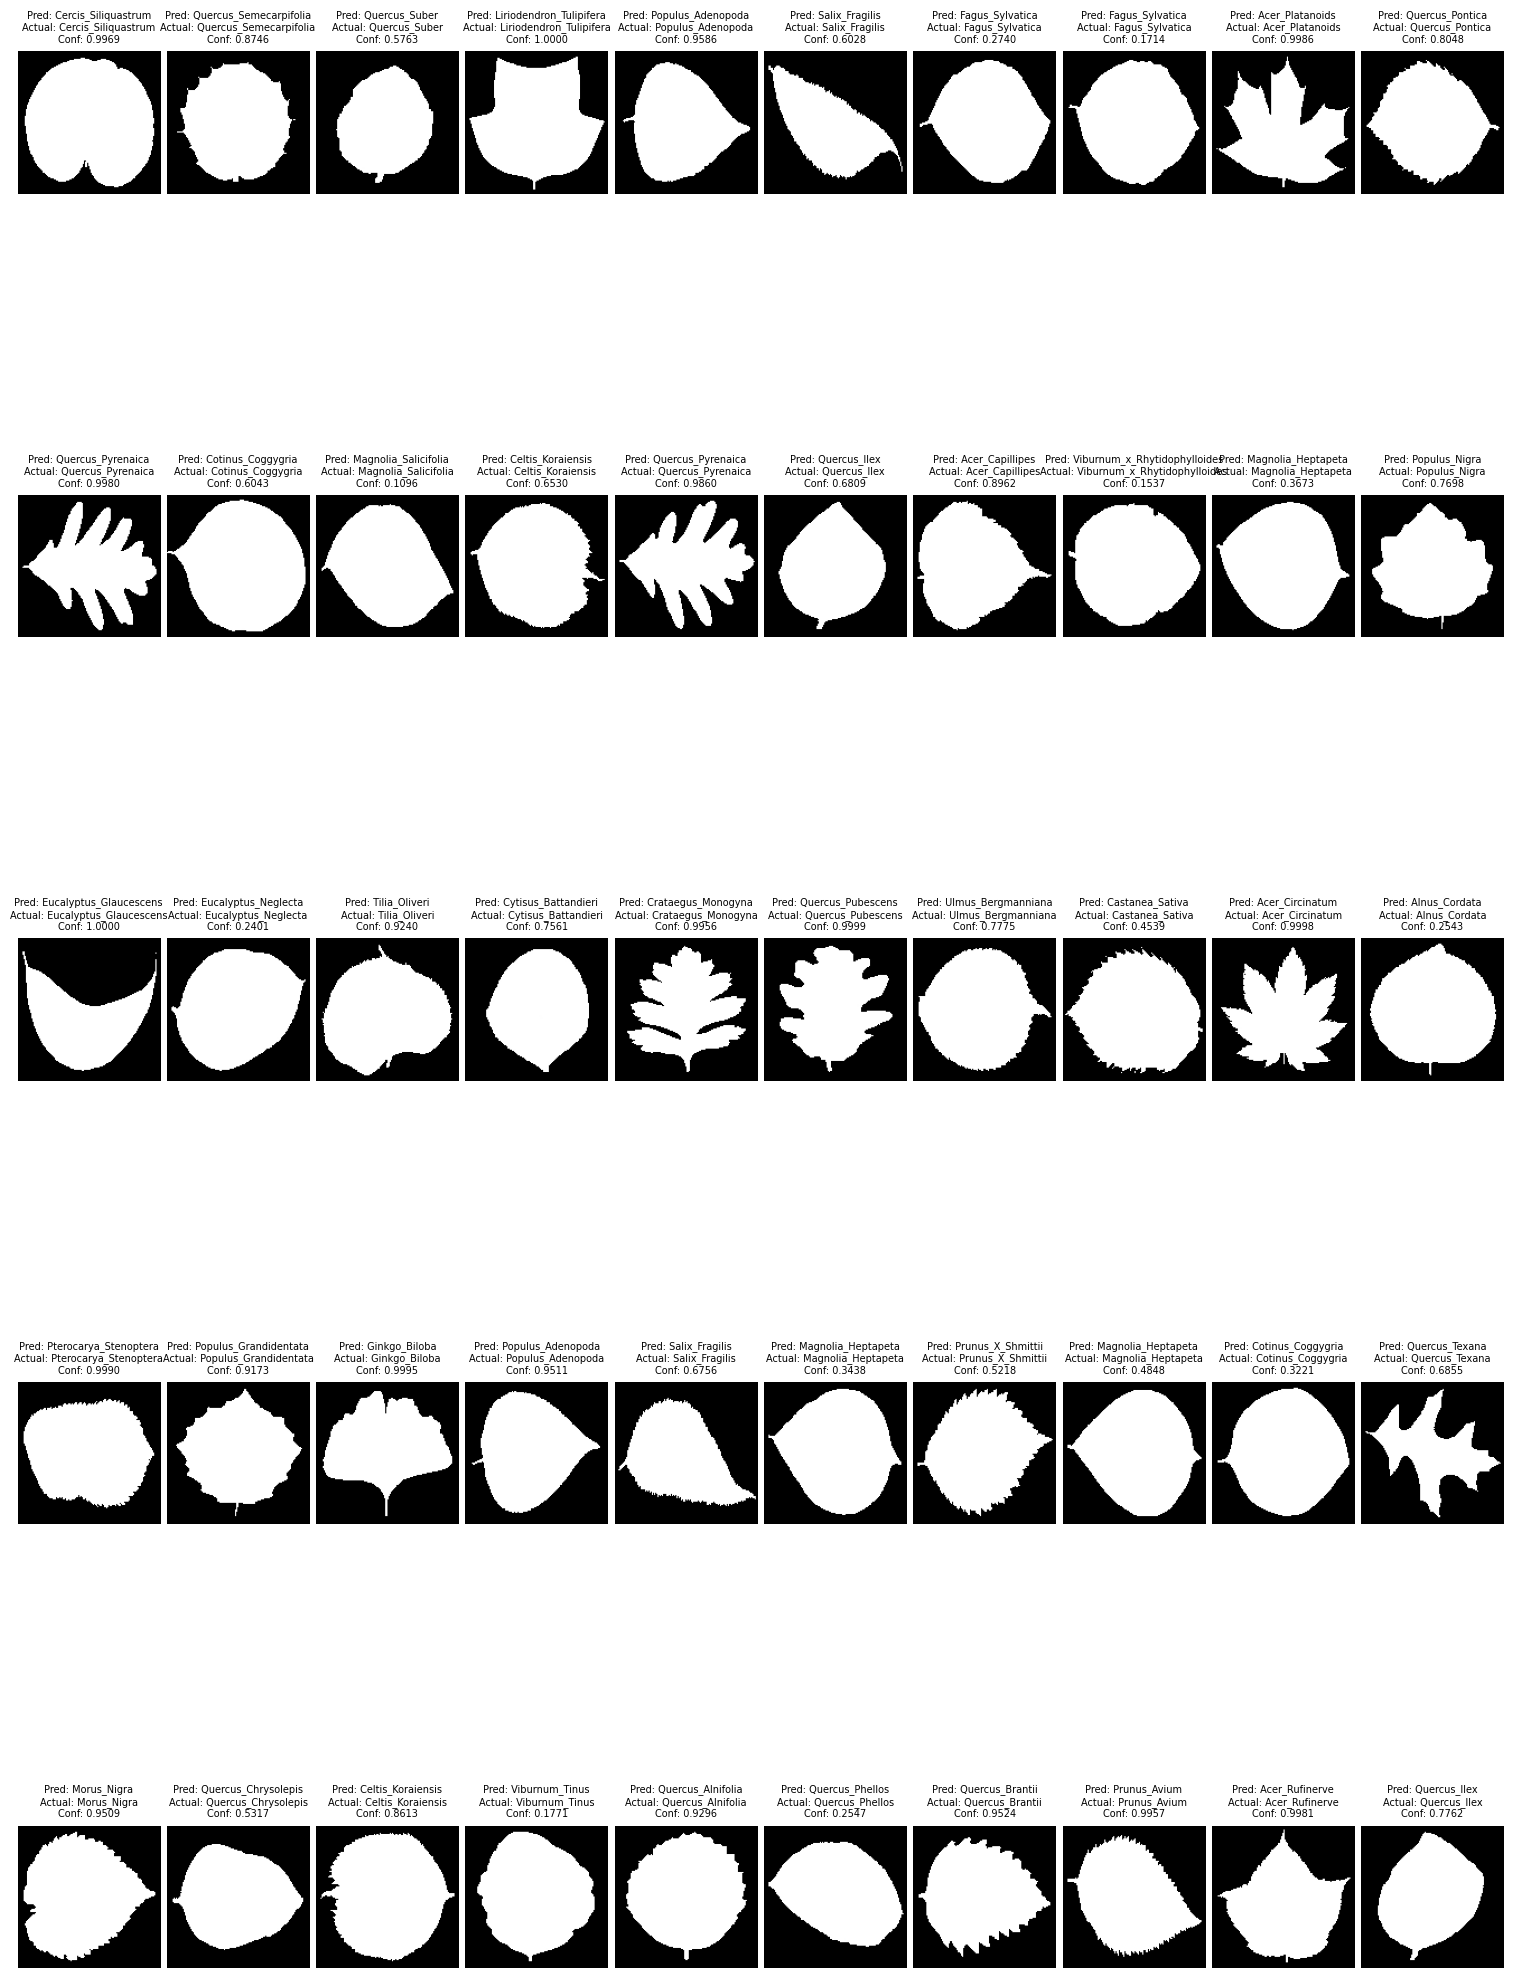

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img

# Convert predictions from one-hot encoding to class indices
predicted_classes = np.argmax(predictions_pretrained, axis=1)

# Map class indices back to species names using the label encoder
predicted_species_names = label_encoder.inverse_transform(predicted_classes)  # Properly decode the species names

# Add predictions and probabilities to a DataFrame for X_test
test_results = pd.DataFrame({
    'id': test_ids,  # Using test_ids from your split
    'predicted_species': predicted_species_names,  # Use decoded species names
    'predicted_probabilities': np.max(predictions_pretrained, axis=1)  # Add maximum probability for each prediction
})

# Merge predicted results with the actual species from the training set
# Assuming 'train' DataFrame contains actual species with 'id' column for mapping
merged_results = test_results.merge(train_compare[['id', 'species']], on='id', how='left')

# Check correctness of predictions
merged_results['correct'] = merged_results['predicted_species'] == merged_results['species']

# Count the number of correct predictions
correct_predictions = merged_results['correct'].sum()
total_predictions = len(merged_results)
accuracy = correct_predictions / total_predictions * 100

# Print the overall accuracy
print(f"Total Predictions: {total_predictions}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Accuracy: {accuracy:.2f}%")

# Display the correct predictions
correct_predictions_df = merged_results[merged_results['correct'] == True]


# Define the number of images to display (10 images per row, 5 rows)
images_per_row = 10
num_rows = 5
total_images = images_per_row * num_rows

# Create the subplot grid (5 rows x 10 columns)
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 5 * num_rows))  # Adjust size as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Display images with predictions and actual species
for idx, (index, row) in enumerate(correct_predictions_df.iterrows()):
    if idx >= total_images:  # Only display the first 50 correct predictions
        break

    image_path = f'/content/images/{int(row["id"])}.jpg'  # Image file path
    predicted_species = row['predicted_species']  # Decoded species name
    predicted_probability = row['predicted_probabilities']
    actual_species = row['species']

    # Load the image and display it
    img = load_img(image_path, target_size=(128, 128))  # Resize the image to ensure they are the same size
    ax = axes[idx]  # Get the axis for this image
    ax.imshow(img)  # Display the image
    ax.axis('off')  # Hide axes for better presentation
    ax.set_title(f"Pred: {predicted_species}\nActual: {actual_species}\nConf: {predicted_probability:.4f}", fontsize=7)  # Smaller font size for title

# Adjust layout for better visualization
plt.subplots_adjust(hspace=0.01,wspace=0.01,bottom=0.01)  # Reduce space between rows
plt.tight_layout(pad=0.5)  # Ensure images are displayed next to each other without overlap
plt.show()


In [27]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
import os

# Upload model files
uploaded = files.upload()

# Get file paths of uploaded models
model_paths = list(uploaded.keys())

if len(model_paths) != 2:
    raise ValueError("Please upload exactly two .keras model files.")

# Load the models
model1 = tf.keras.models.load_model(model_paths[0])
model2 = tf.keras.models.load_model(model_paths[1])

print(f"Models loaded from:\nModel 1: {model_paths[0]}\nModel 2: {model_paths[1]}\n")

# Evaluate both models on the test data
loss1, accuracy1 = model1.evaluate(X_test, y_test, verbose=0)
loss2, accuracy2 = model2.evaluate(X_test, y_test, verbose=0)

print(f"Model 1 - Loss: {loss1:.4f}, Accuracy: {accuracy1 * 100:.2f}%")
print(f"Model 2 - Loss: {loss2:.4f}, Accuracy: {accuracy2 * 100:.2f}%\n")

# Predictions
predictions1 = model1.predict(X_test)
predictions2 = model2.predict(X_test)

# Convert predictions from one-hot encoding to class labels
pred_classes1 = np.argmax(predictions1, axis=1)
pred_classes2 = np.argmax(predictions2, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Comparison of prediction accuracy
accuracy_comparison1 = np.mean(pred_classes1 == true_classes) * 100
accuracy_comparison2 = np.mean(pred_classes2 == true_classes) * 100

print(f"Prediction Accuracy on Test Set:\nModel 1: {accuracy_comparison1:.2f}%\nModel 2: {accuracy_comparison2:.2f}%\n")


Saving best_model_vgg16 (1).keras to best_model_vgg16 (1) (1).keras
Saving best_model_vgg16.keras to best_model_vgg16 (3).keras
Models loaded from:
Model 1: best_model_vgg16 (1) (1).keras
Model 2: best_model_vgg16 (3).keras

Model 1 - Loss: 0.6400, Accuracy: 86.11%
Model 2 - Loss: 0.9297, Accuracy: 86.87%

13/13 ━━━━━━━━━━━━━━━━━━━━ 79s 6s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step
Prediction Accuracy on Test Set:
Model 1: 86.11%
Model 2: 86.87%



In [23]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 99)                  │          25,443 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,143,403 (156.95 MB)

 Trainable params: 13,135,971 (50.11 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

 Optimizer params: 26,271,944 (100.22 MB)

In [24]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 99)                  │          25,443 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,083,243 (80.43 MB)

 Trainable params: 2,122,851 (8.10 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 4,245,704 (16.20 MB)

In [ ]:
# Load the best model
best_model_best_optimizer = tf.keras.models.load_model(best_model_name)
print(best_model_name)

# Use the model for prediction on test data
predictions_best_optimizer = best_model_best_optimizer.predict(X_test)

# Convert predictions from one-hot encoding to class labels
predicted_classes = np.argmax(predictions_best_optimizer, axis=1)

# You can also compare the predicted classes with the true classes in y_test


In [ ]:
test_loss_best_optimizer, test_accuracy_best_optimizer = best_model_best_optimizer.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img

# Convert predictions from one-hot encoding to class indices
predicted_classes_best_optimizer = np.argmax(predictions_best_optimizer, axis=1)

# Map class indices back to species names using the label encoder
predicted_species_names_best_optimizer = label_encoder.inverse_transform(predicted_classes_best_optimizer)  # Properly decode the species names

# Add predictions and probabilities to a DataFrame for X_test
test_results_best_optimizer = pd.DataFrame({
    'id': test_ids,  # Using test_ids from your split
    'predicted_species': predicted_species_names_best_optimizer,  # Use decoded species names
    'predicted_probabilities': np.max(predictions_best_optimizer, axis=1)  # Add maximum probability for each prediction
})

# Merge predicted results with the actual species from the training set
# Assuming 'train' DataFrame contains actual species with 'id' column for mapping
merged_results_best_optimizer = test_results_best_optimizer.merge(train_compare[['id', 'species']], on='id', how='left')

# Check correctness of predictions
merged_results_best_optimizer['correct'] = merged_results_best_optimizer['predicted_species'] == merged_results_best_optimizer['species']

# Count the number of correct predictions
correct_predictions_best_optimizer = merged_results_best_optimizer['correct'].sum()
total_predictions_best_optimizer = len(merged_results_best_optimizer)
accuracy_best_optimizer = correct_predictions_best_optimizer / total_predictions_best_optimizer * 100

# Print the overall accuracy
print(f"Total Predictions: {total_predictions_best_optimizer}")
print(f"Correct Predictions: {correct_predictions_best_optimizer}")
print(f"Accuracy: {accuracy_best_optimizer:.2f}%")

# Display the correct predictions
correct_predictions_df_best_optimizer = merged_results_best_optimizer[merged_results_best_optimizer['correct'] == True]

# Define the number of images to display (10 images per row, 5 rows)
images_per_row = 10
num_rows = 5
total_images = images_per_row * num_rows

# Create the subplot grid (5 rows x 10 columns)
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 5 * num_rows))  # Adjust size as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Display images with predictions and actual species
for idx, (index, row) in enumerate(correct_predictions_df_best_optimizer.iterrows()):
    if idx >= total_images:  # Only display the first 50 correct predictions
        break

    image_path = f'/content/images/{int(row["id"])}.jpg'  # Image file path
    predicted_species = row['predicted_species']  # Decoded species name
    predicted_probability = row['predicted_probabilities']
    actual_species = row['species']

    # Load the image and display it
    img = load_img(image_path, target_size=(128, 128))  # Resize the image to ensure they are the same size
    ax = axes[idx]  # Get the axis for this image
    ax.imshow(img)  # Display the image
    ax.axis('off')  # Hide axes for better presentation
    ax.set_title(f"Pred: {predicted_species}\nActual: {actual_species}\nConf: {predicted_probability:.4f}", fontsize=7)  # Smaller font size for title

# Adjust layout for better visualization
plt.subplots_adjust(hspace=0.01,wspace=0.01,bottom=0.01)  # Reduce space between rows
plt.tight_layout(pad=0.5)  # Ensure images are displayed next to each other without overlap
plt.show()


In [ ]:
# import os
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
# from datetime import datetime

# # Define model architectures to try
# model_no_layers = {

#     'model_2': Sequential([
#         Input(shape=(128, 128, 3)),
#         Conv2D(32, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu'),
#         Dropout(0.5),
#         Dense(y_train.shape[1], activation='softmax')
#     ]),

#     'model_3': Sequential([
#         Input(shape=(128, 128, 3)),
#         Conv2D(32, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#         Conv2D(128, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu'),
#         Dropout(0.5),
#         Dense(y_train.shape[1], activation='softmax')
#     ]),

#     'model_4': Sequential([
#         Input(shape=(128, 128, 3)),
#         Conv2D(32, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#         Conv2D(128, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#         Conv2D(256, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu'),
#         Dropout(0.5),
#         Dense(y_train.shape[1], activation='softmax')
#     ])
# }

# best_val_accuracy = 0
# best_model_name = ''

# # Loop through each model architecture and train
# for model_name, model in model_no_layers.items():
#     print(f"Training with {model_name} architecture...")

#     # Define TensorBoard log directory with model name and timestamp
#     log_dir = f'/content/logs/{model_name}'
#     tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

#     # Model checkpoint to save the best model
#     checkpoint_path = f'/content/best_model_{model_name}.keras'
#     model_checkpoint = ModelCheckpoint(
#         checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max'
#     )

#     # Compile the model
#     model.compile(
#         optimizer=Adam(learning_rate=0.001),  # You can experiment with different optimizers here
#         loss='categorical_crossentropy',
#         metrics=['accuracy']
#     )

#     # Train the model
#     history = model.fit(
#         X_train,
#         y_train,
#         epochs=10,
#         batch_size=32,
#         validation_data=(X_test, y_test),
#         callbacks=[
#             EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
#             tensorboard_callback,
#             model_checkpoint
#         ]
#     )

#     # Get the best validation accuracy
#     val_acc = max(history.history['val_accuracy'])
#     print(f"{model_name} validation accuracy: {val_acc:.4f}")

#     # Save the best-performing model name
#     if val_acc > best_val_accuracy:
#         best_val_accuracy = val_acc
#         best_model_name = checkpoint_path

# # Print the best-performing model and model path
# print(f"Best model architecture: {best_model_name.split('_')[-2]}")
# print(f"Best model saved at: {best_model_name}")


In [ ]:
# # Load the best model
# best_model_no_layers = tf.keras.models.load_model(best_model_name)

# # Use the model for prediction on test data
# predictions_no_layers = best_model_no_layers.predict(X_test)

# # Convert predictions from one-hot encoding to class labels
# predicted_classes_no_layers = np.argmax(predictions_no_layers, axis=1)

# # You can also compare the predicted classes with the true classes in y_test


In [ ]:
# test_loss_best_optimizer, test_accuracy_best_optimizer = best_model_no_layers.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from tensorflow.keras.preprocessing.image import load_img

# # Convert predictions from one-hot encoding to class indices
# predicted_classes_no_layers = np.argmax(predictions_no_layers, axis=1)

# # Map class indices back to species names using the label encoder
# predicted_species_names_no_layers = label_encoder.inverse_transform(predicted_classes_no_layers)  # Properly decode the species names

# # Add predictions and probabilities to a DataFrame for X_test
# test_results_no_layers = pd.DataFrame({
#     'id': test_ids,  # Using test_ids from your split
#     'predicted_species': predicted_species_names_no_layers,  # Use decoded species names
#     'predicted_probabilities': np.max(predictions_no_layers, axis=1)  # Add maximum probability for each prediction
# })

# # Merge predicted results with the actual species from the training set
# # Assuming 'train' DataFrame contains actual species with 'id' column for mapping
# merged_results_no_layers = test_results_no_layers.merge(train_compare[['id', 'species']], on='id', how='left')

# # Check correctness of predictions
# merged_results_no_layers['correct'] = merged_results_no_layers['predicted_species'] == merged_results_no_layers['species']

# # Count the number of correct predictions
# correct_predictions_no_layers = merged_results_no_layers['correct'].sum()
# total_predictions_no_layers = len(merged_results_no_layers)
# accuracy_no_layers = correct_predictions_no_layers / total_predictions_no_layers * 100

# # Print the overall accuracy
# print(f"Total Predictions: {total_predictions_no_layers}")
# print(f"Correct Predictions: {correct_predictions_no_layers}")
# print(f"Accuracy: {accuracy_no_layers:.2f}%")

# # Display the correct predictions
# correct_predictions_df_no_layers = merged_results_no_layers[merged_results_no_layers['correct'] == True]

# # Define the number of images to display (10 images per row, 5 rows)
# images_per_row = 10
# num_rows = 5
# total_images = images_per_row * num_rows

# # Create the subplot grid (5 rows x 10 columns)
# fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 5 * num_rows))  # Adjust size as needed
# axes = axes.flatten()  # Flatten the axes array for easy iteration

# # Display images with predictions and actual species
# for idx, (index, row) in enumerate(correct_predictions_df_no_layers.iterrows()):
#     if idx >= total_images:  # Only display the first 50 correct predictions
#         break

#     image_path = f'/content/images/{int(row["id"])}.jpg'  # Image file path
#     predicted_species = row['predicted_species']  # Decoded species name
#     predicted_probability = row['predicted_probabilities']
#     actual_species = row['species']

#     # Load the image and display it
#     img = load_img(image_path, target_size=(128, 128))  # Resize the image to ensure they are the same size
#     ax = axes[idx]  # Get the axis for this image
#     ax.imshow(img)  # Display the image
#     ax.axis('off')  # Hide axes for better presentation
#     ax.set_title(f"Pred: {predicted_species}\nActual: {actual_species}\nConf: {predicted_probability:.4f}", fontsize=7)  # Smaller font size for title

# # Adjust layout for better visualization
# plt.subplots_adjust(hspace=0.01,wspace=0.01,bottom=0.01)  # Reduce space between rows
# plt.tight_layout(pad=0.5)  # Ensure images are displayed next to each other without overlap
# plt.show()


In [ ]:
# optimizers = ['adam', 'sgd', 'rmsprop']
# results_optimizer = []

# for opt in optimizers:
#     print(f"Testing with optimizer: {opt}")
#     model = create_model(optimizer=opt)
#     history = model.fit(
#         X_train, y_train,
#         validation_data=(X_test, y_test),
#         epochs=5,
#         batch_size=32,
#         verbose=1
#     )
#     val_accuracy = max(history.history['val_accuracy'])
#     results_optimizer.append((opt, val_accuracy))

# print("Results for Optimizers:")
# for opt, acc in results_optimizer:
#     print(f"Optimizer: {opt}, Validation Accuracy: {acc:.2f}")


In [ ]:
# # Number of layers to test
# num_layers_to_test = [2, 3, 4]
# results_num_layers = []

# for num_layers in num_layers_to_test:
#     print(f"Testing with {num_layers} layers")
#     # Create the model with the specified number of layers
#     model = create_model(num_layers=num_layers)

#     # Train the model
#     history = model.fit(
#         X_train, y_train,
#         validation_data=(X_test, y_test),
#         epochs=5,
#         batch_size=32,
#         verbose=1
#     )

#     # Record the maximum validation accuracy
#     val_accuracy = max(history.history['val_accuracy'])
#     results_num_layers.append((num_layers, val_accuracy))

# # Print the results
# print("Results for Number of Layers:")
# for layers, acc in results_num_layers:
#     print(f"Layers: {layers}, Validation Accuracy: {acc:.2f}")


In [ ]:
# # Save the trained model
# model.save(f"model_with_{num_layers}_layers.h5")


SGD Optimizer

In [ ]:
# import os
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.callbacks import EarlyStopping

# # Your previous image preprocessing and encoding steps are assumed to be correct

# # Define the model
# model = Sequential([
#     # First convolutional layer with Input layer instead of input_shape
#     Input(shape=(128, 128, 3)),  # Defining the input shape here
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),

#     # Second convolutional layer
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),

#     # Flatten the output for fully connected layers
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),  # Dropout to reduce overfitting
#     Dense(y_train.shape[1], activation='softmax')  # Output layer (number of classes)
# ])

# # Compile the model with SGD optimizer
# model.compile(
#     optimizer=SGD(learning_rate=0.01, momentum=0.9),  # SGD with momentum
#     loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if labels are integers
#     metrics=['accuracy']
# )

# # Training the model with validation split
# history = model.fit(
#     X_train,
#     y_train,
#     epochs=10,
#     batch_size=32,
#     validation_data=(X_test, y_test),  # Use the test set as the validation set
#     callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]  # Early stopping based on validation loss
# )
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

SGD , dropout (0.3) , 2 layers

In [ ]:
# import os
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.callbacks import EarlyStopping

# # Your previous image preprocessing and encoding steps are assumed to be correct

# # Define the model
# model = Sequential([
#     # First convolutional layer with Input layer instead of input_shape
#     Input(shape=(128, 128, 3)),  # Defining the input shape here
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),

#     # Second convolutional layer
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),

#     # Flatten the output for fully connected layers
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.3),  # Dropout to reduce overfitting
#     Dense(y_train.shape[1], activation='softmax')  # Output layer (number of classes)
# ])

# # Compile the model with SGD optimizer
# model.compile(
#     optimizer=SGD(learning_rate=0.01, momentum=0.9),  # SGD with momentum
#     loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if labels are integers
#     metrics=['accuracy']
# )

# # Training the model with validation split
# history = model.fit(
#     X_train,
#     y_train,
#     epochs=10,
#     batch_size=32,
#     validation_data=(X_test, y_test),  # Use the test set as the validation set
#     callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]  # Early stopping based on validation loss
# )
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

SGD, dropout (0.3) , 4 layers

In [ ]:
# import os
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.callbacks import EarlyStopping

# # Define the model with 4 convolutional layers
# model = Sequential([
#     # First convolutional layer
#     Input(shape=(128, 128, 3)),  # Input layer
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),

#     # Second convolutional layer
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),

#     # Third convolutional layer
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),

#     # Fourth convolutional layer
#     Conv2D(256, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),

#     # Flatten the output for fully connected layers
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.3),  # Dropout to reduce overfitting
#     Dense(y_train.shape[1], activation='softmax')  # Output layer (number of classes)
# ])

# # Compile the model with SGD optimizer
# model.compile(
#     optimizer=SGD(learning_rate=0.01, momentum=0.9),  # SGD with momentum
#     loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if labels are integers
#     metrics=['accuracy']
# )

# # Training the model with validation split
# history = model.fit(
#     X_train,
#     y_train,
#     epochs=10,
#     batch_size=32,
#     validation_data=(X_test, y_test),  # Use the test set as the validation set
#     callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]  # Early stopping based on validation loss
# )

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
